In [4]:
from uxsim import *
from uxsim.OSMImporter import OSMImporter

W = World(
    name="",
    deltan=5,
    tmax=7200,
    print_mode=1, save_mode=1, show_mode=0, 
    random_seed=0
)

c:\Siddhartha\traffic\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
import tqdm as notebook_tqdm

In [29]:
# nodes, links = OSMImporter.import_osm_data(north=35.817, south=35.570, east=139.881, west=139.583, custom_filter='["highway"~"motorway"]')
# nodes, links = OSMImporter.import_osm_data(north=28.500, south=28.652, east=77.322, west=77.166, custom_filter='["highway"~"trunk|primary|mortorway|primary|secondary|residential|tertiary"]')
nodes, links = OSMImporter.import_osm_data(north=28.6975, south=28.6777, east=77.218, west=77.202, custom_filter='["highway"~"trunk|primary|mortorway|primary|secondary|residential|tertiary"]')


Start downloading OSM data. This may take some time.


Download completed
imported network size:
 number of links: 970
 number of nodes: 375


In [3]:
import csv

def save_nodes_and_links_to_csv(nodes, links, nodes_file='nodes.csv', links_file='links.csv'):
    """Save nodes and links to CSV files."""
    # Save nodes to CSV
    with open(nodes_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['id', 'longitude', 'latitude'])  # Write header
        writer.writerows(nodes)  # Write node data
    
    # Save links to CSV
    with open(links_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['name', 'start_node_id', 'end_node_id', 'attribute1', 'attribute2'])  # Write header
        writer.writerows(links)  # Write link data

def read_nodes_and_links_from_csv(nodes_file='nodes1.csv', links_file='links1.csv'):
    """Read nodes and links from CSV files."""
    nodes = []
    links = []
    # Read nodes from CSV
    with open(nodes_file, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header
        for row in reader:
            nodes.append([int(row[0]), float(row[1]), float(row[2])])
    
    # Read links from CSV
    with open(links_file, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header
        for row in reader:
            links.append([row[0], int(row[1]), int(row[2]), int(row[3]), float(row[4])])
    
    return nodes, links

In [31]:
save_nodes_and_links_to_csv(nodes, links)

In [37]:
import pandas as pd

# Load the links.csv and nodes1.csv files into pandas DataFrames
links_df = pd.read_csv('links.csv')
nodes_df = pd.read_csv('nodes1.csv')

# Convert the 'id' column in nodes_df to string to match with link node IDs
nodes_df['id'] = nodes_df['id'].astype(str)

# Filter links where either start_node_id or end_node_id is not present in nodes_df
filtered_links_df = links_df[(links_df['start_node_id'].astype(str).isin(nodes_df['id'])) & 
                             (links_df['end_node_id'].astype(str).isin(nodes_df['id']))]

# Save the filtered links to links1.csv
filtered_links_df.to_csv('links1.csv', index=False)


In [5]:
nodes_read, links_read = read_nodes_and_links_from_csv()

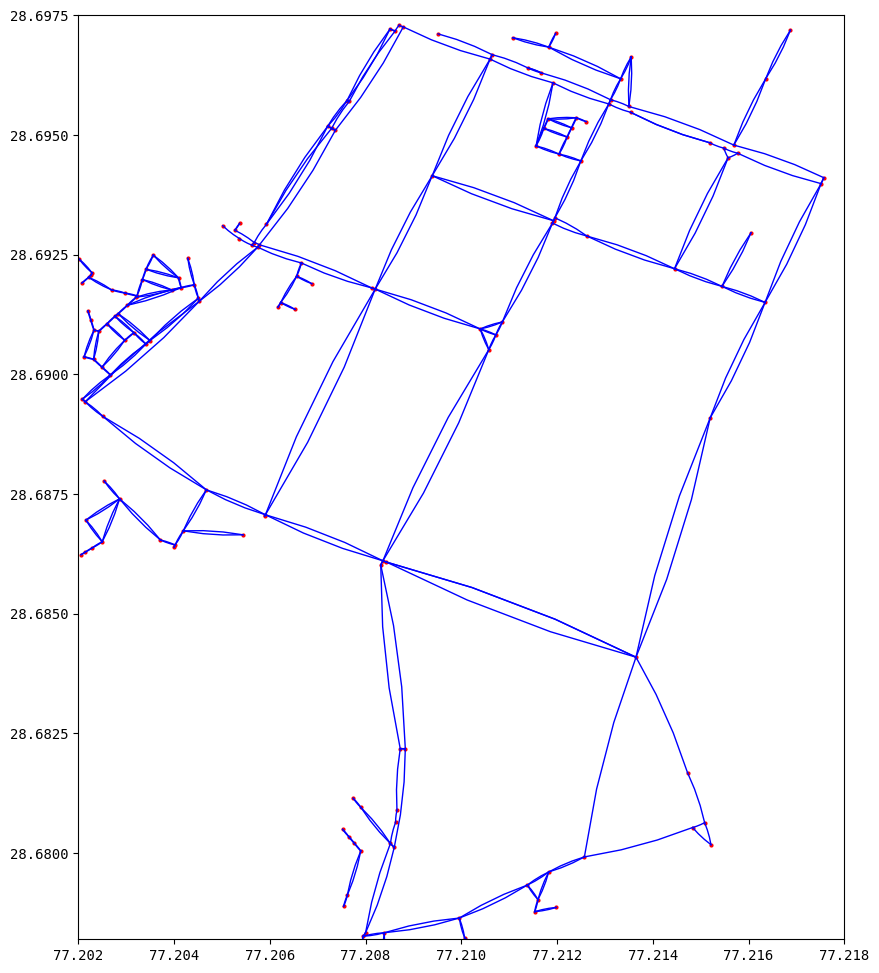

In [6]:
OSMImporter.osm_network_visualize(nodes_read, links_read, show_link_name=0,xlim=[77.202, 77.218], ylim=[28.6782, 28.6975])
